# Credit Card Fraud Detection EDA  
**Author:** Baher Alabbar  
**Date:** July 2025

---

## Overview and Goals

The main goal of this EDA is to understand the features in the dataset and how they relate to the target variable. We aim to identify any noticeable patterns that might help in the modeling phase. Many of the features are anonymized or encoded—common in real-world datasets to protect privacy—so this EDA will remain short and to the point, giving a general sense of the data. Most of the in-depth work will be handled during modeling.

The target variable is **`Class`**, which indicates whether a transaction is fraudulent (`1`) or not (`0`).

---

## EDA Sections

1. [Load and Inspect the Data](#load-and-inspect-the-data)  
2. [Dataset Feature Descriptions](#dataset-feature-descriptions)  
3. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)  
4. [Feature Analysis & Relationships](#feature-analysis--relationships)  
5. [Summary and Next Steps](#summary-and-next-steps)  
6. [Credits](#credits)

---

## Load and Inspect the Data

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [252]:
pd.options.display.max_columns = None  # Show all columns
pd.options.display.max_rows = 500

import warnings

# ignore FutureWarnings and UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [253]:
df = pd.read_csv("../data/split/train.csv")
df.head().T

,0,1,2,3,4
Time,119191.000000,71750.000000,151977.000000,55709.000000,66654.000000
V1,2.052427,1.220356,0.892824,-3.146021,1.194996
V2,-0.133236,-0.159191,-1.440698,2.247634,-0.007495
V3,-1.740621,-0.444349,-0.637940,0.901397,0.301285
V4,0.277935,-0.094437,3.912871,0.146162,0.750199
V5,0.337999,0.104457,0.099291,-2.109360,-0.297494
V6,-0.826933,-0.345790,2.433288,-0.148312,-0.405836
V7,0.334629,0.170867,-0.308891,-1.533191,0.060410
V8,-0.227039,-0.094996,0.603227,2.073663,-0.150482
V9,0.267655,0.187572,-0.113826,0.499394,0.400860


In [254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,170884.0,94966.107886,47464.723773,0.000000,54348.000000,84923.500000,139404.000000,172792.000000
V1,170884.0,-0.001070,1.958944,-46.855047,-0.922071,0.016603,1.316250,2.451888
V2,170884.0,-0.000904,1.650481,-63.344698,-0.599127,0.065839,0.802518,22.057729
V3,170884.0,-0.002722,1.521820,-48.325589,-0.896376,0.177007,1.028302,4.226108
V4,170884.0,-0.002603,1.416490,-5.683171,-0.848978,-0.020895,0.738812,16.875344
V5,170884.0,0.000151,1.394123,-113.743307,-0.691840,-0.054185,0.612154,34.099309
V6,170884.0,0.000779,1.338331,-23.496714,-0.768986,-0.274228,0.400359,73.301626
V7,170884.0,-0.000811,1.260122,-43.557242,-0.554440,0.040417,0.569221,120.589494
V8,170884.0,-0.002327,1.208709,-73.216718,-0.209596,0.021461,0.326026,18.282168
V9,170884.0,-0.000622,1.098393,-13.434066,-0.642036,-0.051777,0.595095,10.392889


In [255]:
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

- The integer column must be the `Class` column. 
- We don't have any categorical columns to deal with.

In [256]:
df.Class.value_counts()

Class
0    170579
1       305
Name: count, dtype: int64

We observe that the dataset is imbalanced, with a significantly higher number of legitimate transactions compared to fraudulent ones. While this is expected in real-world scenarios, it can pose challenges during modeling, as the models may become biased toward predicting the majority class. Addressing this imbalance will be important to ensure fair and effective fraud detection.

In [257]:
df.shape

(170884, 31)

In [258]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Dataset Feature Descriptions

- **Time**:  
  The number of seconds elapsed between a given transaction and the first transaction in the dataset.

- **V1 to V28**:  
  These features are the result of a PCA (Principal Component Analysis) transformation applied to the original features. They are anonymized to protect user privacy and sensitive information. Each component captures a direction of variance in the data.

- **Amount**:  
  The monetary amount of the transaction.

- **Class**:  
  The target variable. A value of `1` indicates a fraudulent transaction, while `0` indicates a legitimate one.

## Data Cleaning and Preprocessing

### Handling Missing Values

In [259]:
df.isna().sum().value_counts()

0    31
Name: count, dtype: int64

We have no missing values in the dataset.

### Handling Duplicates

In [260]:
df.duplicated().value_counts()

False    170436
True        448
Name: count, dtype: int64

In [261]:
df[df.Class == 1].duplicated().value_counts()

False    297
True       8
Name: count, dtype: int64

Since there doesn’t appear to be a meaningful relationship between duplicate records and fraudulent transactions, we can safely remove the duplicates from the dataset.

In [262]:
df = df.drop_duplicates()

### Handling Outliers and Skewed Distributions

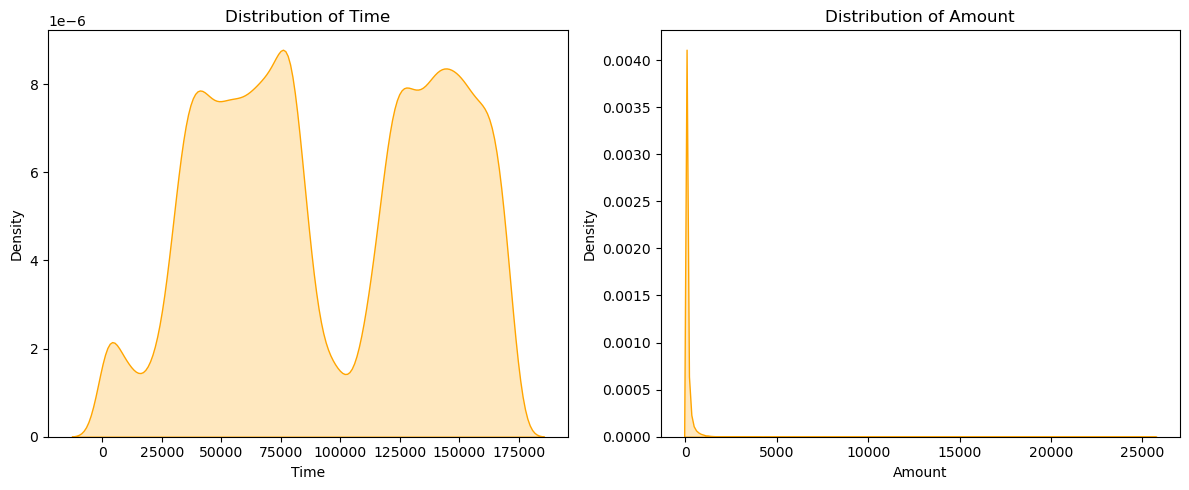

In [263]:
plt.figure(figsize=(12, 5))

# Time
plt.subplot(1, 2, 1)
sns.kdeplot(df['Time'], fill=True, color='orange')
plt.title('Distribution of Time')

# Amount
plt.subplot(1, 2, 2)
sns.kdeplot(df['Amount'], fill=True, color='orange')
plt.title('Distribution of Amount')

plt.tight_layout()
plt.show()

The Time feature appears to have a fairly natural distribution and doesn’t require any outlier removal. In contrast, the Amount feature is highly right-skewed. To reduce this skewness, we can apply a log transformation. During the modeling phase, we may experiment with both the original and transformed versions of Amount to evaluate which yields better results. However, for the purposes of analysis, we will retain only the original Amount column.

In [264]:
df["log_Amount"] = np.log1p(df["Amount"])

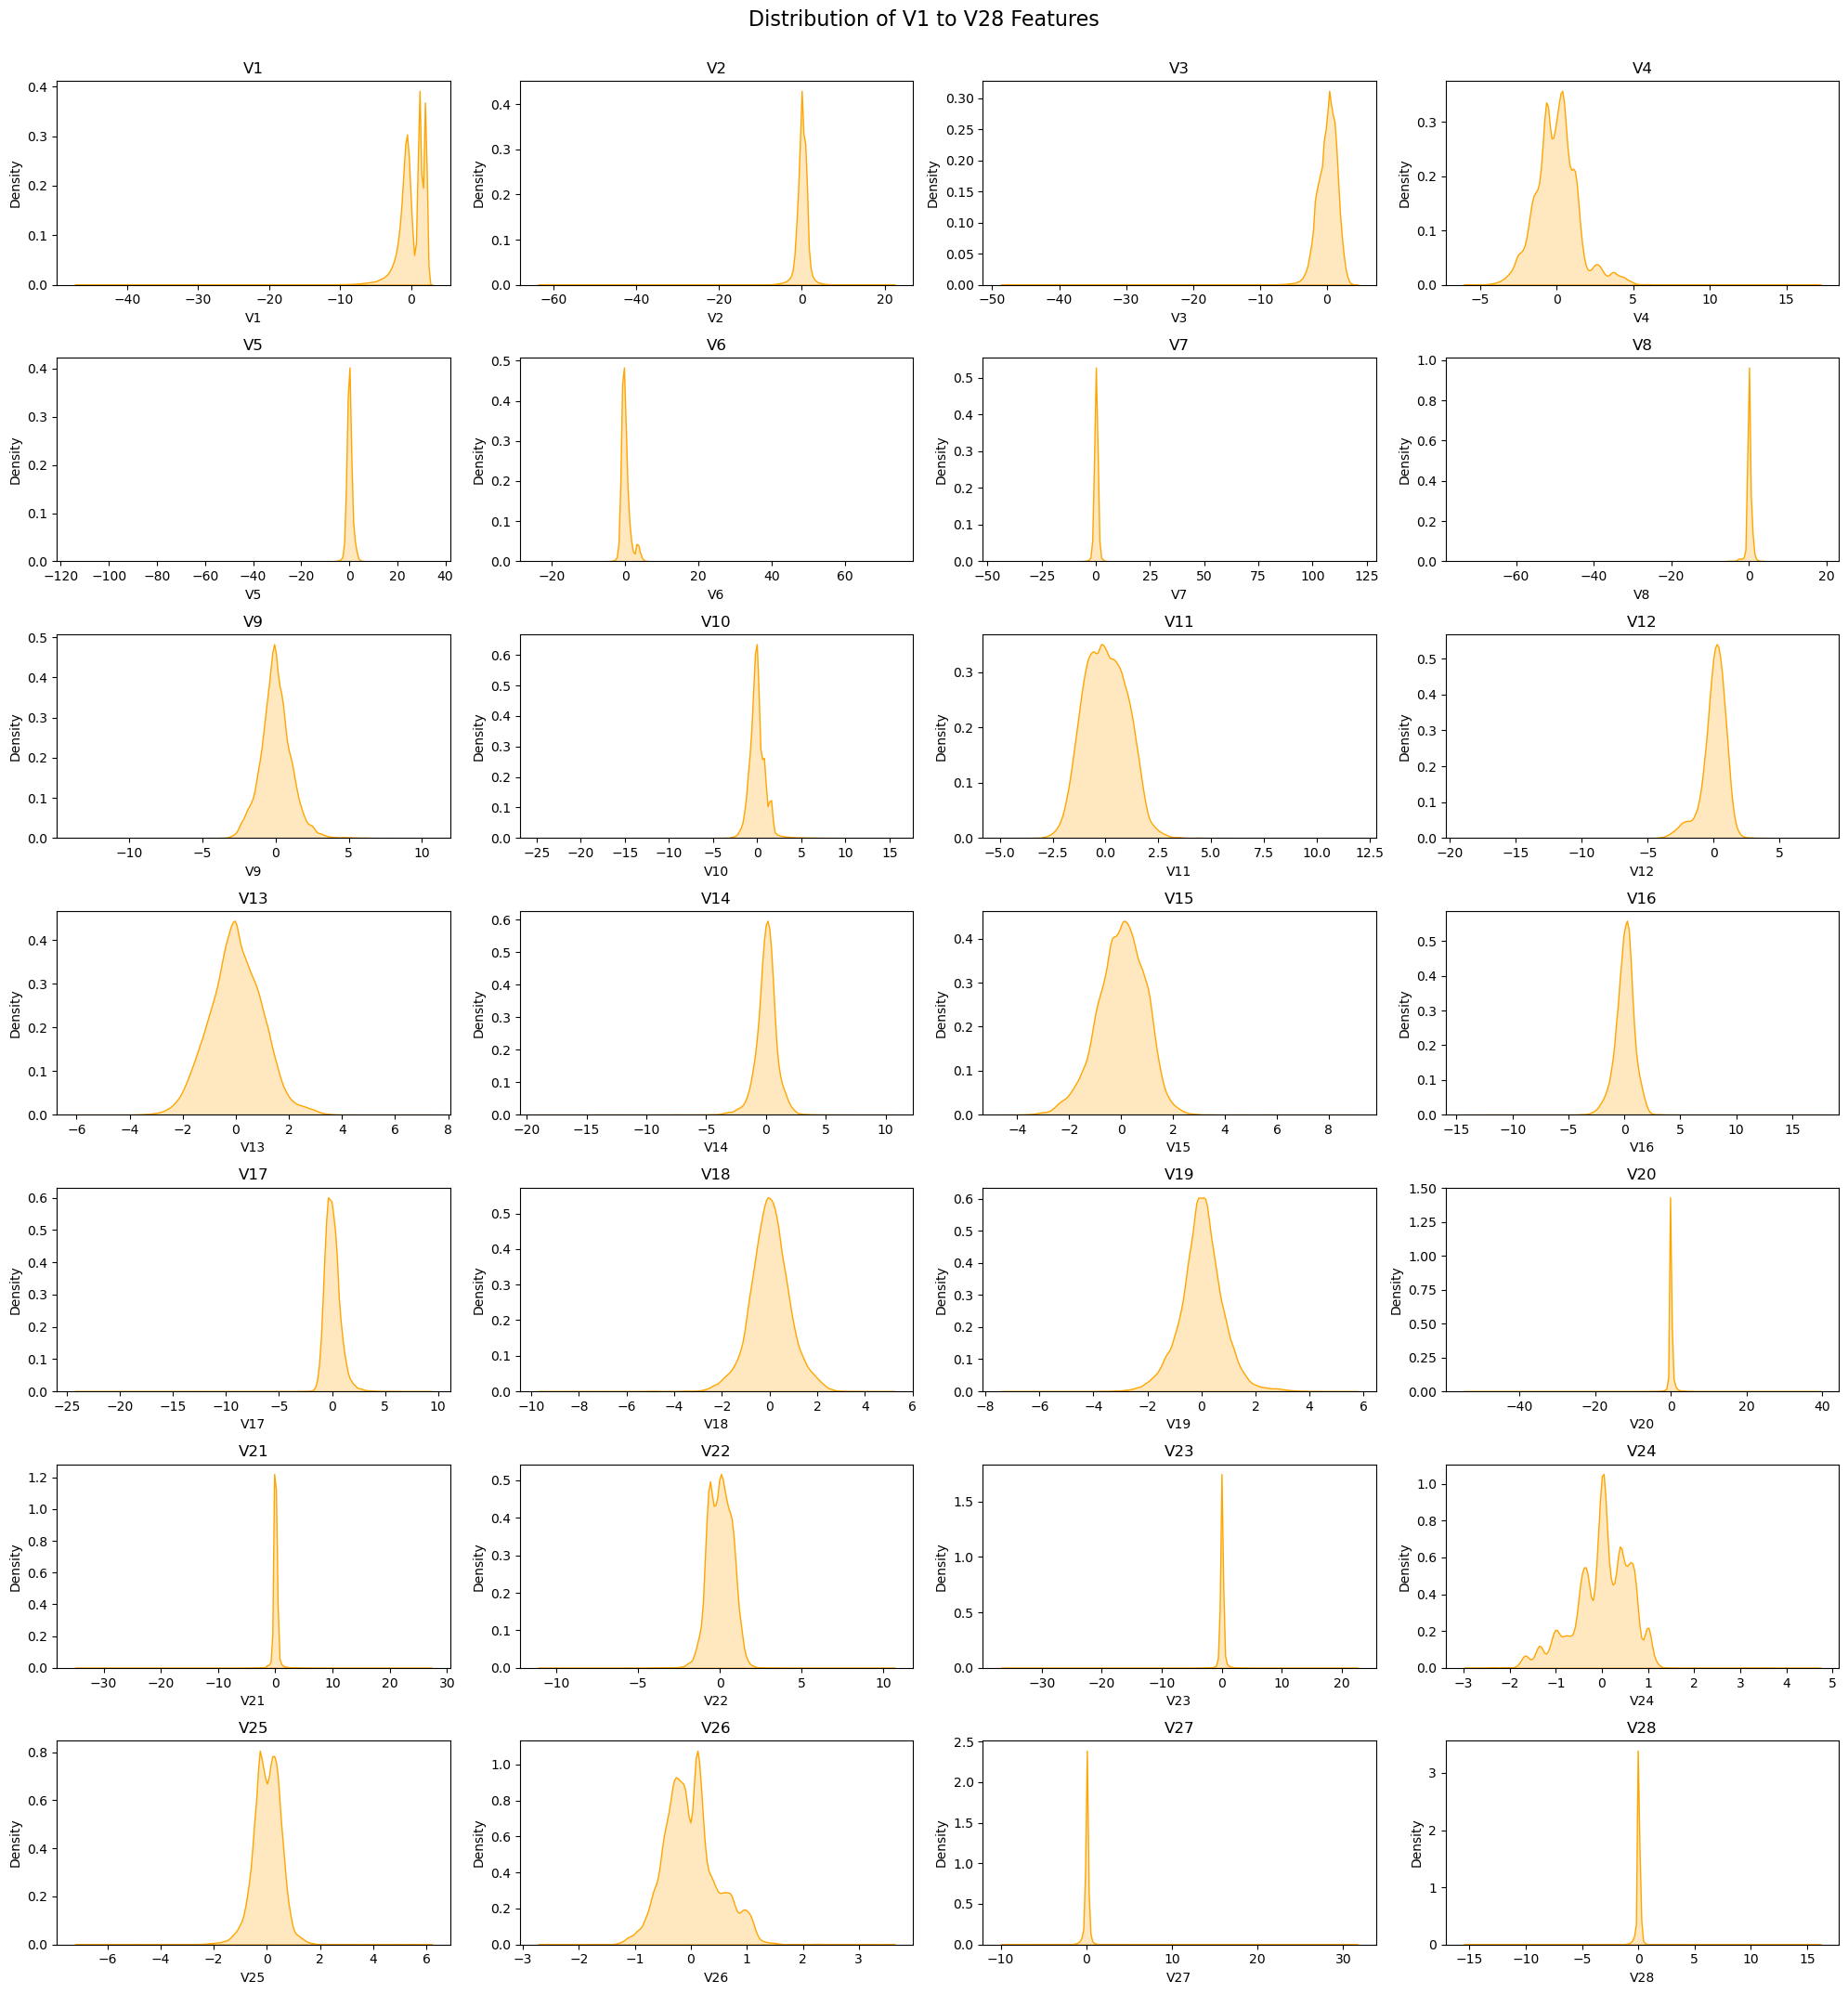

In [265]:
v_features = [f'V{i}' for i in range(1, 29)]
n_cols = 4
n_rows = int(np.ceil(len(v_features) / n_cols))

plt.figure(figsize=(20, n_rows * 3))

for idx, feature in enumerate(v_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.kdeplot(df[feature], fill=True, color='orange')
    plt.title(feature)
    plt.tight_layout()

plt.suptitle('Distribution of V1 to V28 Features', fontsize=16, y=1.02)
plt.show()

Since the exact meanings of these features are unknown due to anonymization, we can’t perform detailed analysis on them. However, for modeling purposes, it’s important to note that features such as V5, V6, V7, V8, V20, V21, V23, V27, and V28 are highly skewed. Applying log transformations to these columns may be beneficial for certain models that are sensitive to feature distributions.

To evaluate whether these transformations are potentially useful, we compare the correlation matrices of the original features and their log-transformed versions. This helps us observe how the relationship between the features and the target variable (Class) changes after transformation, which can guide our modeling decisions.

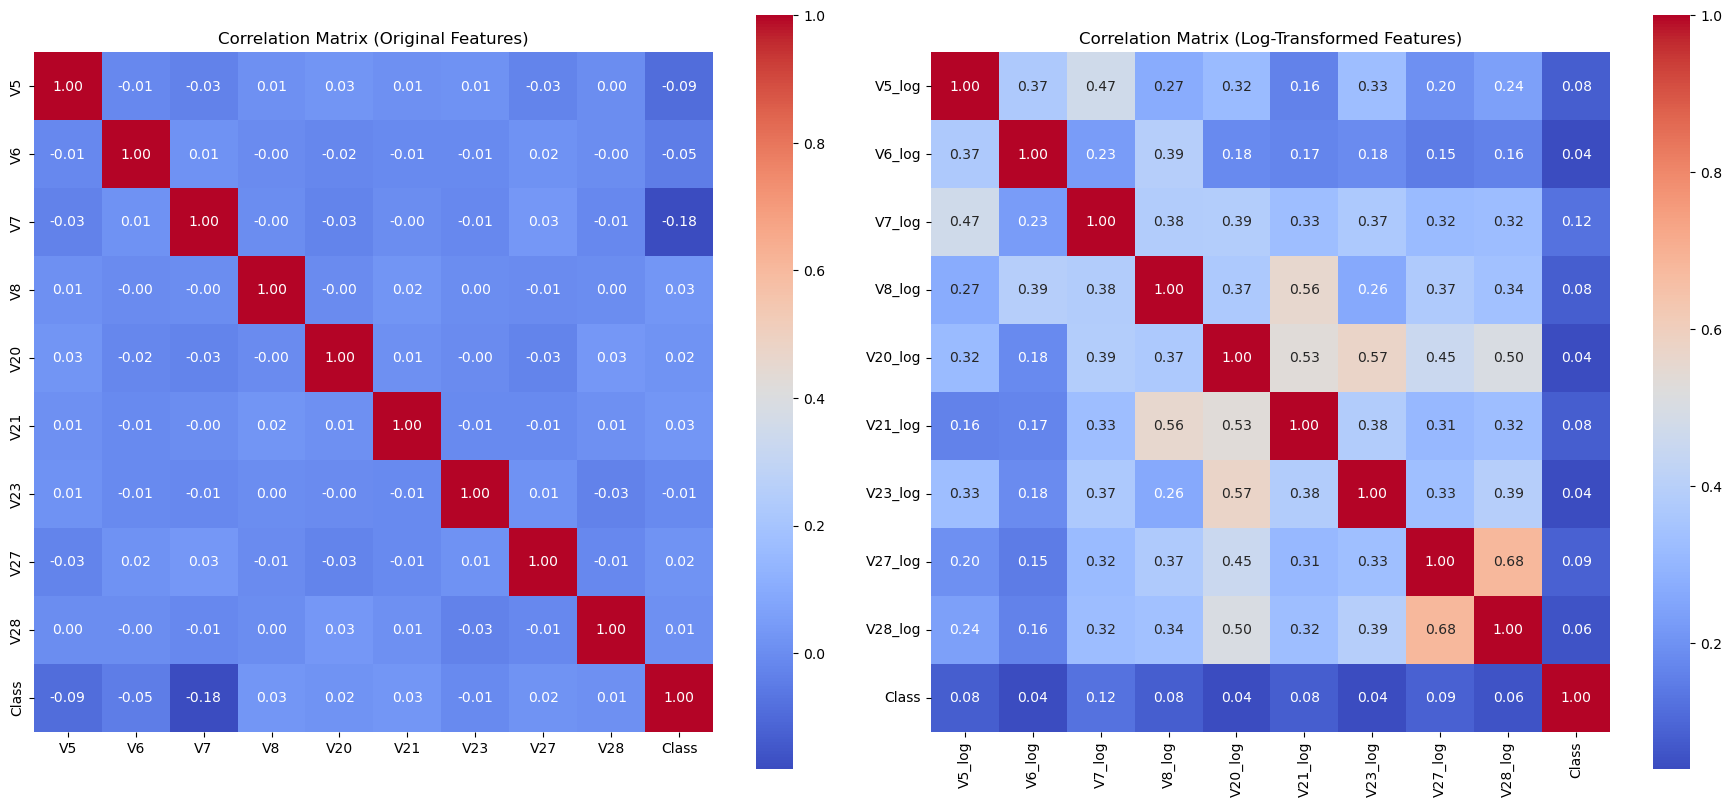

In [266]:
# Define features and create log-transformed versions
features = ['V5', 'V6', 'V7', 'V8', 'V20', 'V21', 'V23', 'V27', 'V28']

df_log = df.copy()
for col in features:
    df_log[f'{col}_log'] = np.log1p(df_log[col].abs())  # Use abs to avoid log(negative)

# Create correlation matrices
original_corr = df[features + ['Class']].corr()
log_corr = df_log[[f'{col}_log' for col in features] + ['Class']].corr()

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(original_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[0])
axes[0].set_title('Correlation Matrix (Original Features)')

sns.heatmap(log_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[1])
axes[1].set_title('Correlation Matrix (Log-Transformed Features)')

plt.tight_layout()
plt.show()

We observe a slight improvement in the correlation between some features and the target variable Class after applying log transformations. However, the transformation also increased the correlation among several features themselves, which may introduce multicollinearity issues. As a result, the overall benefit is not clearly significant. Therefore, we will take an empirical approach during modeling and test both the original and transformed versions to determine which yields better performance.

## Feature Analysis & Relationships

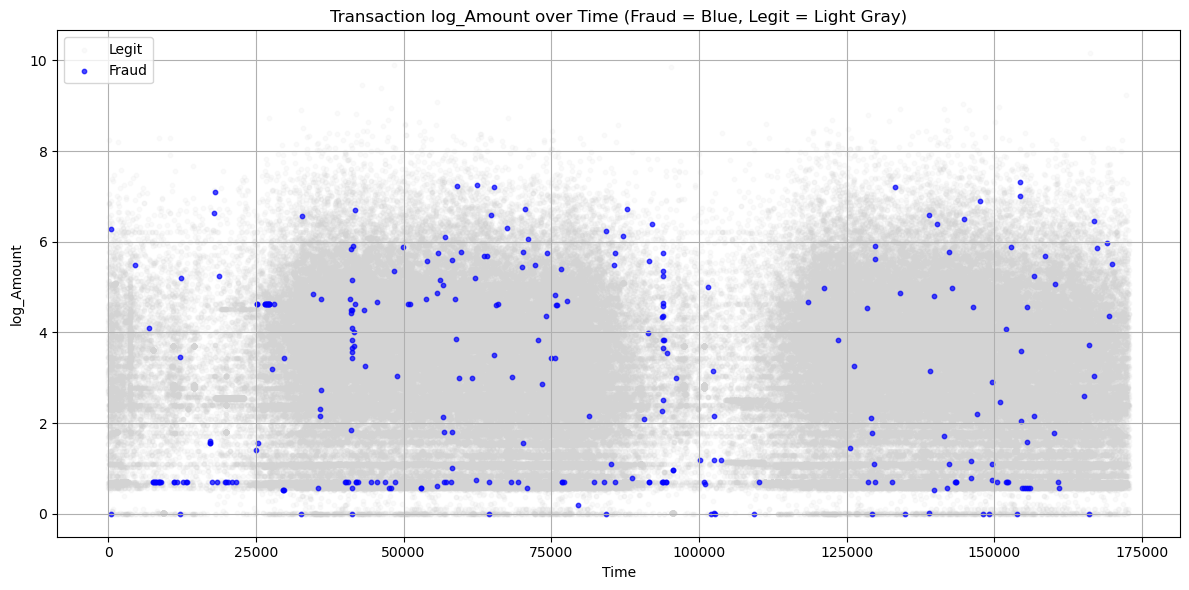

In [267]:
# Create a color map with custom transparency
colors = df['Class'].map({0: 'lightgray', 1: 'blue'})
alphas = df['Class'].map({0: 0.1, 1: 0.7})  # Lower opacity for legit, higher for fraud

# Create scatter plot
plt.figure(figsize=(12, 6))
for alpha_val in [0, 1]:
    subset = df[df['Class'] == alpha_val]
    plt.scatter(subset['Time'], subset['log_Amount'],
                c='lightgray' if alpha_val == 0 else 'blue',
                alpha=0.1 if alpha_val == 0 else 0.7,
                s=10, label='Fraud' if alpha_val == 1 else 'Legit')

# Labels and title
plt.xlabel('Time')
plt.ylabel('log_Amount')
plt.title('Transaction log_Amount over Time (Fraud = Blue, Legit = Light Gray)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df.drop('log_Amount', axis=1 ,inplace=True)

We observe that fraudulent transactions are scattered across various amounts without any clear pattern, providing no strong indication of a relationship between fraud and transaction amount. Therefore, the main insight is that these fraudulent activities appear to occur randomly. This is likely because attackers often try to target a large number of accounts indiscriminately, hoping to successfully carry out unauthorized transactions by chance.

Since the meanings of the remaining features are unknown, the only way to analyze their relevance is by using model-based feature importance to gain a general idea of which features are likely to have the greatest impact during modeling.

Two main techniques will be used to assess feature importance:  
1.	Analyzing the final feature weights from logistic regression.  
2.	Evaluating feature importance scores from a random forest model.

##### Logistic Regression Weights

In [268]:
X_train = df.drop(columns='Class')
y_train = df['Class']

In [269]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# fit logistic regression
coef = model.coef_.flatten()

# Get coefficients and corresponding feature names
coef = model.coef_.flatten()
feature_names = X_train.columns

# Create and sort the coefficient DataFrame
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': np.abs(coef)
}).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

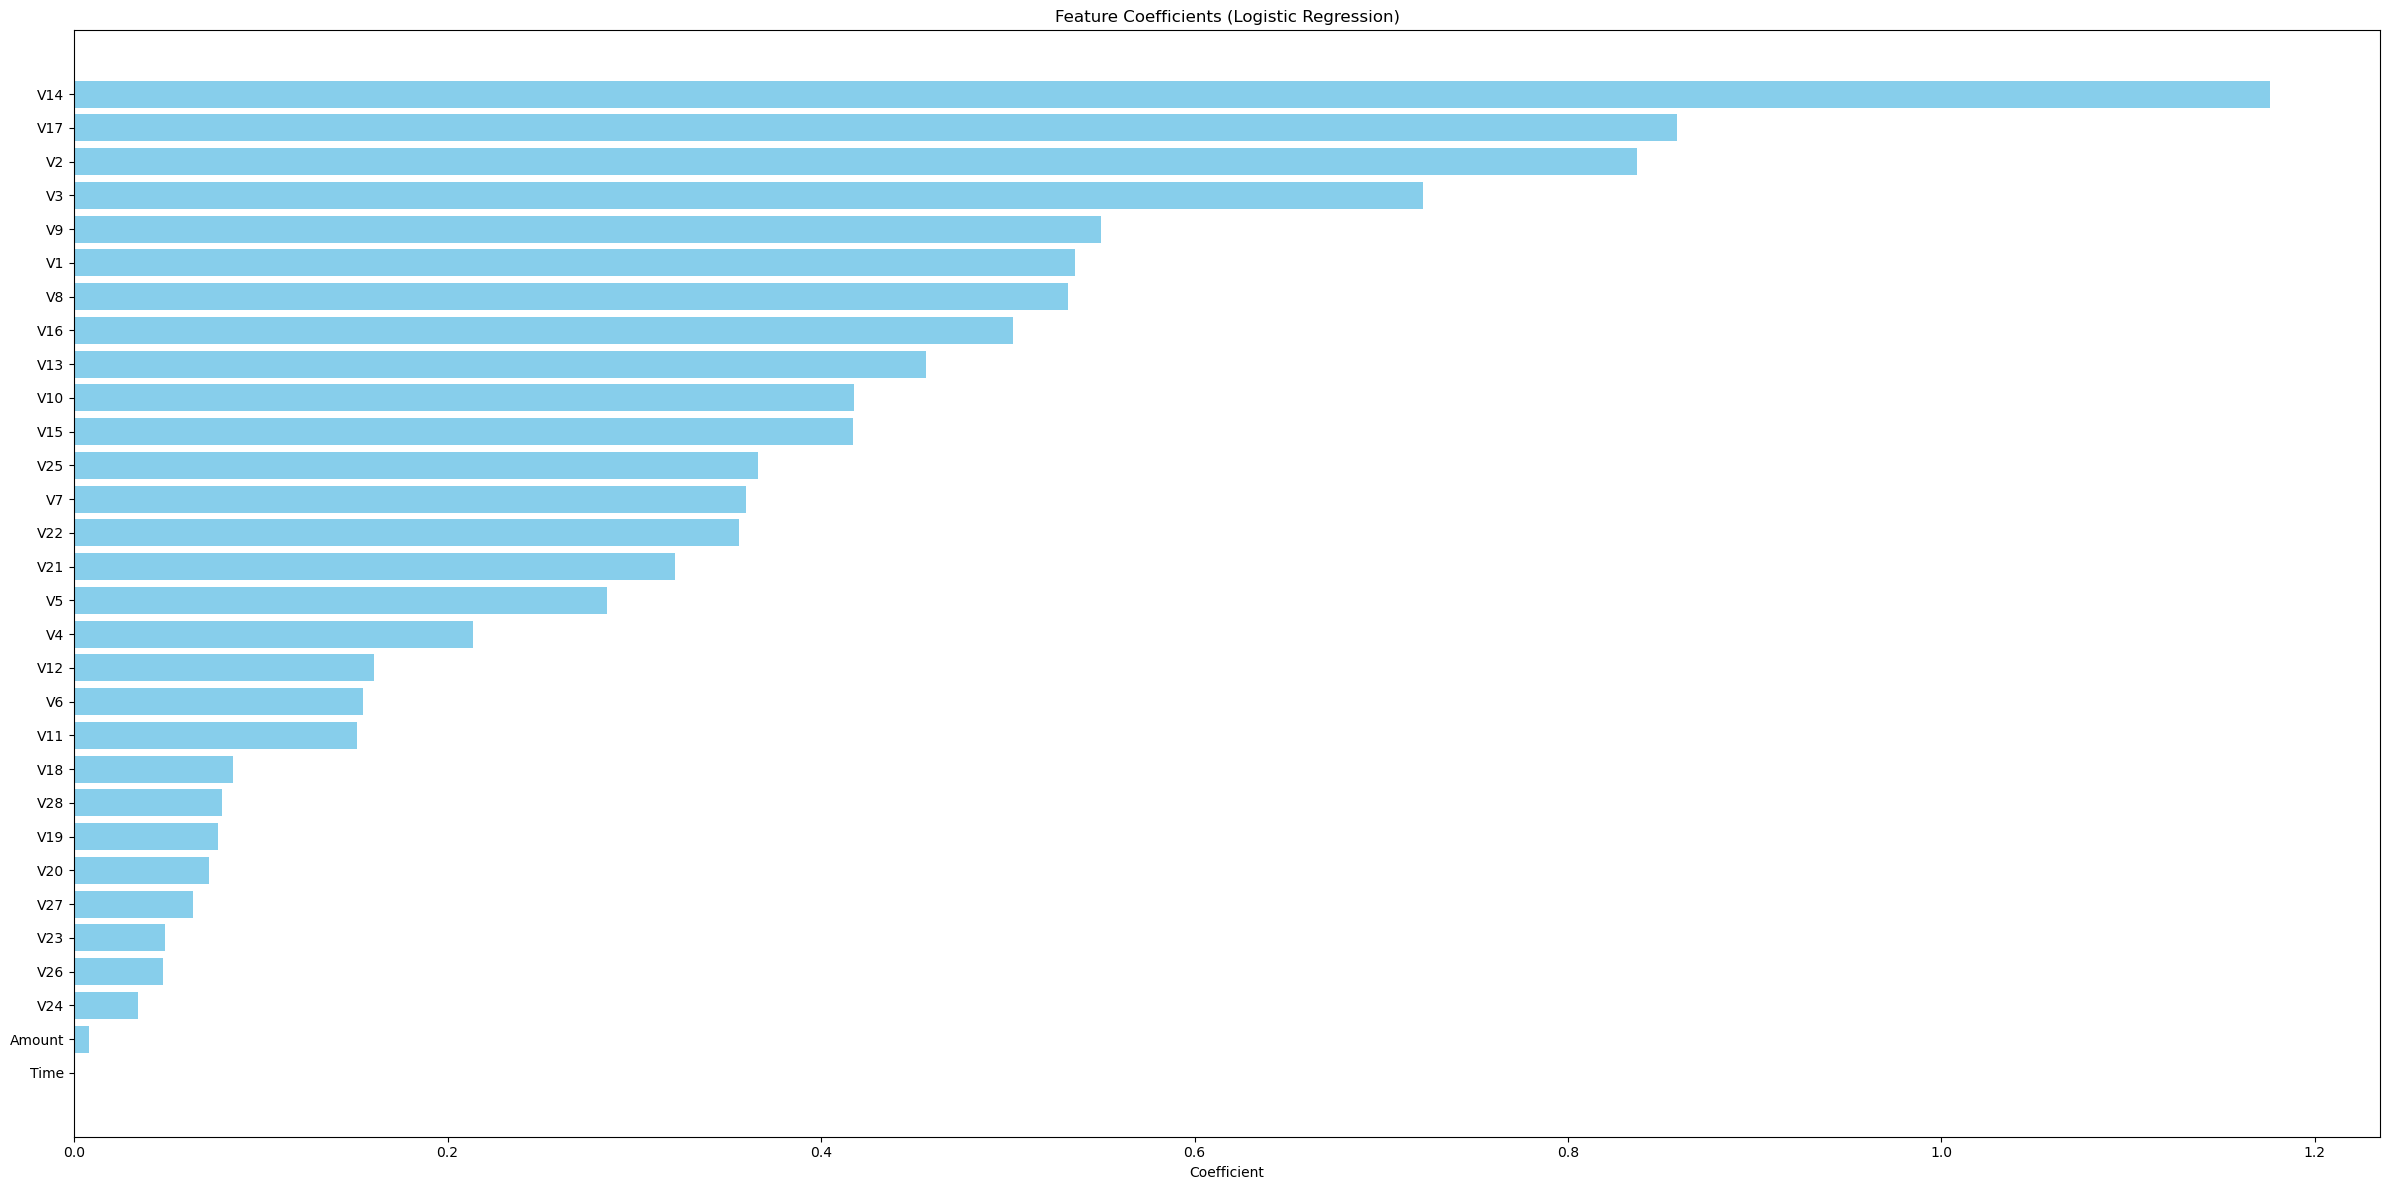

In [270]:
# Plot top features by coefficient
plt.figure(figsize=(24, 12))
plt.barh(coef_df['feature'], coef_df['coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Feature Coefficients (Logistic Regression)')
plt.gca().invert_yaxis()  # Highest coefficients at the top
plt.tight_layout()
plt.show()

##### Random Forest Importance

In [271]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create DataFrame for feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

rf_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

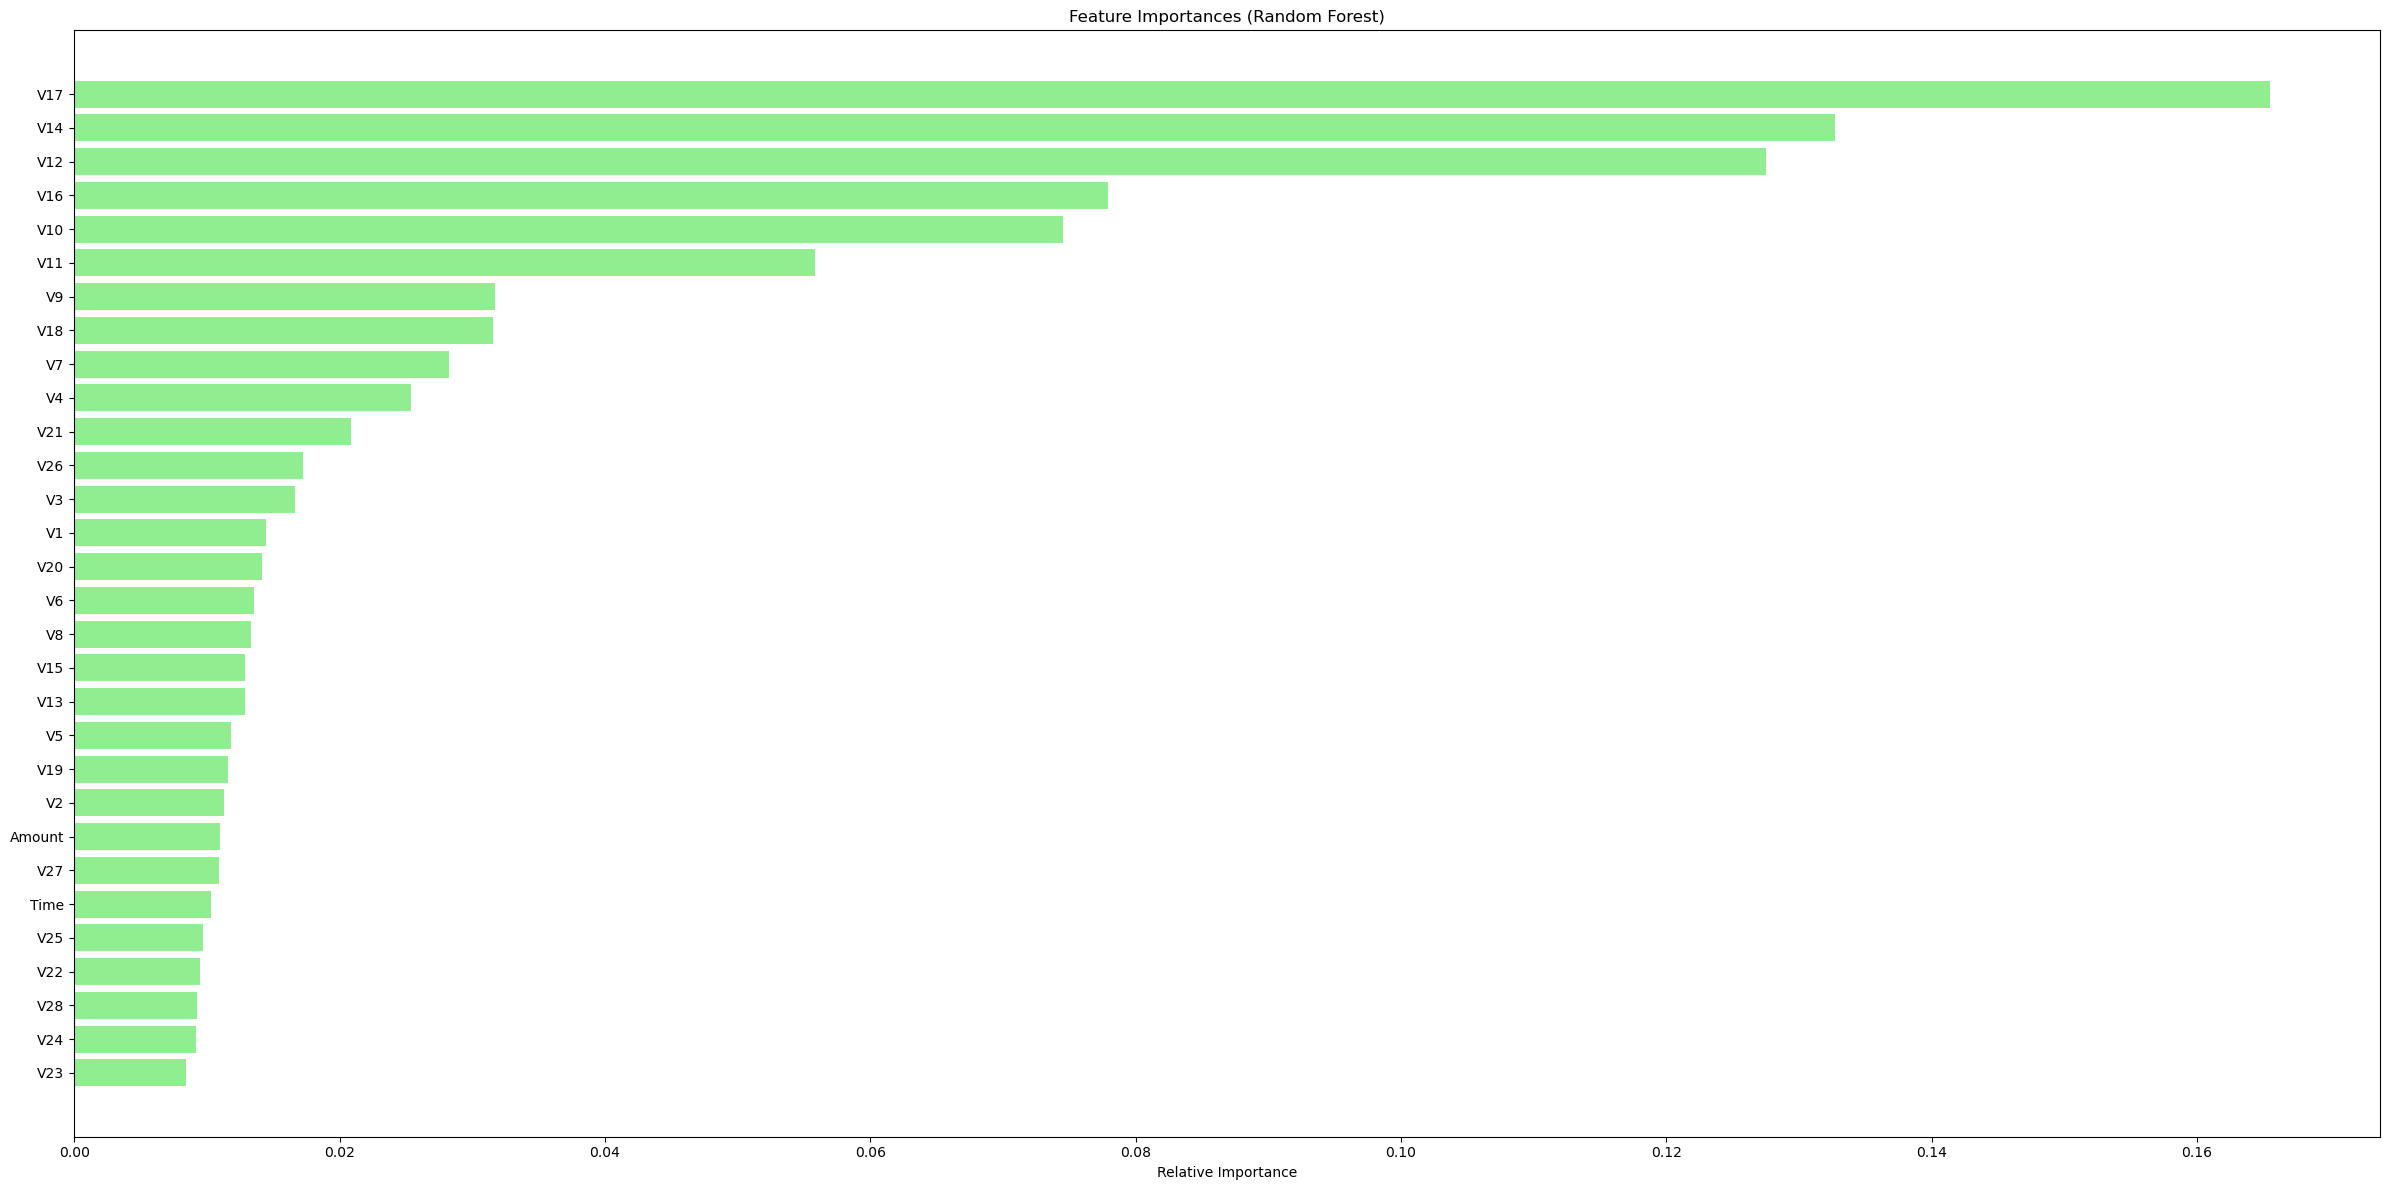

In [272]:
# Plot
plt.figure(figsize=(24, 12))
plt.title("Feature Importances (Random Forest)")
plt.barh(rf_df['feature'], rf_df['importance'], color='lightgreen')
plt.gca().invert_yaxis()  # Highest at top
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

##### Insights on Feature Importance

The features Time and Amount appear to be less influential compared to many of the anonymized components (e.g., V1–V28). This supports the assumption that transaction amounts and timestamps are relatively random and not strongly associated with the target class.

Both models consistently highlight V14 and V17 as highly important features, suggesting these components may carry a strong signal related to fraudulent activity, possibly even before the PCA transformation was applied.

The difference in feature importance rankings between logistic regression and random forest is largely due to how these models interpret data:
- Logistic regression captures only linear relationships with the target. It functions similarly to linear regression but applies a sigmoid function to convert the prediction into a probability and uses log loss (rather than MSE) as the objective function, since MSE is non-convex in this context. Without polynomial feature expansion, logistic regression cannot model non-linear relationships, so its feature importance ranking tends to align with linear correlations.
- In contrast, random forest can naturally model non-linear patterns, which is why features like V10, V12, and V16 appear highly important in the random forest model but rank lower in logistic regression.

This insight suggests that applying polynomial feature expansion to features such as V10, V12, and V16 could potentially enhance the performance of the logistic regression model by enabling it to capture non-linear relationships. However, such expansion is generally not necessary for models like random forest or neural networks, which already capture complex interactions natively.

Finally, the fact that both models rank V14 and V17 among the top features suggests that these components likely have strong linear relationships with the target, as well as general importance across different model types.

## Summary and Next Steps

In this EDA, we observed that many features exhibit skewed distributions, suggesting that applying log transformations to the specified features could be beneficial. Additionally, other numerical transformations such as squaring or cubing may be explored during modeling. As discussed earlier, we may also consider applying polynomial feature expansion to features that appear to have non-linear relationships with the target in order to improve logistic regression performance. Alternatively, we can rely on models like neural networks or random forests, which can inherently capture such non-linearities and may offer more robust results. Due to the nature of the data, we were unable to uncover particularly meaningful insights at this stage, so the majority of our efforts will be focused on the modeling phase.

## Credits

- The dataset used in this project is private and not publicly accessible.
- Some code snippets for generating plots were created with the assistance of ChatGPT. However, all plot ideas and insights are my own.